In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, ParameterGrid
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data.csv')

In [2]:
df.shape

(2718, 22)

In [3]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
len(df.Country.unique())

183

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2718 entries, 0 to 2717
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2718 non-null   object 
 1   Year                             2718 non-null   int64  
 2   Status                           2718 non-null   object 
 3   Life expectancy                  2718 non-null   float64
 4   Adult Mortality                  2718 non-null   float64
 5   infant deaths                    2718 non-null   int64  
 6   Alcohol                          2564 non-null   float64
 7   percentage expenditure           2718 non-null   float64
 8   Hepatitis B                      2188 non-null   float64
 9   Measles                          2718 non-null   int64  
 10  BMI                              2692 non-null   float64
 11  under-five deaths                2718 non-null   int64  
 12  Polio               

In [6]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2718.000000,2718.000000,2718.000000,2718.000000,2564.000000,2718.000000,2188.000000,2718.000000,2692.000000,2718.000000,2700.000000,2529.000000,2700.000000,2718.000000,2317.000000,2.116000e+03,2692.000000,2692.000000,2576.000000,2576.000000
mean,2007.113687,69.204525,164.432303,30.825239,4.672512,757.071658,80.884826,2370.999632,38.314339,42.767476,82.528148,5.943606,82.135926,1.788263,7646.459541,1.261063e+07,4.892236,4.925149,0.626697,11.996079
std,4.537979,9.612530,125.512789,121.786599,4.051664,2007.472092,25.010075,11174.241799,19.954800,165.704415,23.294376,2.488801,23.849574,5.221587,14455.594394,6.238395e+07,4.434584,4.522269,0.213323,3.364109
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.000000,63.100000,73.250000,0.000000,0.990000,5.832385,77.000000,0.000000,19.200000,0.000000,77.000000,4.260000,78.000000,0.100000,459.291200,1.829220e+05,1.600000,1.600000,0.492000,10.100000
50%,2007.000000,72.200000,142.000000,3.000000,3.820000,67.687008,92.000000,18.000000,43.450000,4.000000,93.000000,5.730000,93.000000,0.100000,1741.142552,1.365022e+06,3.400000,3.400000,0.679000,12.300000
75%,2011.000000,75.800000,227.000000,22.000000,7.832500,446.887709,97.000000,372.000000,56.100000,28.000000,97.000000,7.530000,97.000000,0.800000,6337.882993,7.383590e+06,7.200000,7.300000,0.781000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.938000,20.700000


In [7]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [8]:
# Dividing a data into train, validation and test sets

random_seed = 42

Xtrain, Xval, ytrain, yval = train_test_split(df.drop(columns = ['Life expectancy']), df['Life expectancy'], test_size=0.4, random_state=random_seed)

Xval, Xtest, yval, ytest = train_test_split(Xval, yval, test_size=0.3, random_state=random_seed)

In [9]:
print(Xtrain.shape)
print(Xval.shape)
print(Xtest.shape)

(1630, 21)
(761, 21)
(327, 21)


We will employ a pipeline to manage missing data, utilizing SimpleImputer with a 'mean' strategy for imputation. Additionally, we'll standardize the data using StandardScaler. For categorical variables, such as country names, we will apply One-Hot Encoding to transform them into integer representations. The rationale for using One-Hot Encoding in the implementation of our regression model is that it assigns a unique coefficient to each country. In our model, this means that each country will have its own coefficient, which will influence the model's output only when the corresponding country's value is 1

In [10]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline


# Identify numerical and categorical columns
numerical_cols = Xtrain.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = Xtrain.select_dtypes(include=['object', 'bool']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# print(numerical_transformer.fit(Xtrain, ytrain).score(Xtest, ytest))

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


# Bundle preprocessing for numerical and categorical data
preprocessor = make_column_transformer(
        (numerical_transformer, numerical_cols),
        (categorical_transformer, categorical_cols))

# Correctly apply transformations to the feature data
train_data_prepared = preprocessor.fit_transform(Xtrain)
val_data_prepared = preprocessor.transform(Xval)
test_data_prepared = preprocessor.transform(Xtest)

In [11]:
display(train_data_prepared)

<1630x204 sparse matrix of type '<class 'numpy.float64'>'
	with 33502 stored elements in Compressed Sparse Row format>

Now our data is in a matrix representation

In [12]:
# Converting to a dense format
dense_matrix = train_data_prepared.todense()

# Display the dense matrix
display(dense_matrix[4, :].shape)

display(dense_matrix[4, :])

(1, 204)

matrix([[-0.47365845,  2.52267498, -0.23749792,  0.03157494, -0.16845896,
          0.        , -0.20146311, -0.52499696, -0.24236051,  0.15339923,
          0.55251324,  0.15603617,  3.91621495, -0.33039706, -0.30146045,
          1.92648384,  1.86648074, -0.32165118, -0.13816079,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.

We have 19 parameters from the original dataset, which have been transformed via StandardScaler. Additionally, the 'Status' column was split into two columns, one for each value ('Developing' and 'Developed'), and there are 183 countries represented. In total, this results in 204 parameters.

In [13]:
from IPython.display import HTML

# Embed the image in HTML
HTML('<img src="https://insidelearningmachines.com/wp-content/uploads/2021/06/RF_pic.001-1536x864.jpeg" alt="Image" />')

In [14]:
from sklearn.utils import resample
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, ParameterGrid
import numpy as np
# Váš kód zde


########################################################
# Předpřipravená kostra modelu náhodného lesa
class CustomRandomForest:
    """
    Třída Vašeho modelu
    Bude se jednat o model náhodného lesa, kde podmodely tvoří rozhodovací stromy pro regresi.
    Pro podmodely můžete použít implementaci DecisionTreeRegressor ze sklearn.
    """
    def __init__(self, n_estimators=100, max_samples=0.5, max_depth=None, min_samples_split=2, min_samples_leaf=1, **kwargs):
        """
        Konstruktor modelu
        Základní hyperparametery:
            n_estimators - počet podmodelů - rozhodovacích stromů.
            max_samples - vyberte si, zda tento parametr bude označovat relativní počet bodů (tj. číslo mezi 0 a 1) 
                          nebo absolutní počet bodů (tj. číslo mezi 1 a velikostí trénovací množiny), 
                          které budou pro každý podmodel rozhodovacího stromu náhodně vybrány z trénovací množiny (bootstrap) a použity k jeho trénování.
            max_depth - maximální hloubka každého z podmodelů rozhodovacího stromu.
            kwargs - (volitelně) případné další hyperparametry, které pošlete do podmodelů rozhodovacího stromu
        """
        self.n_estimators = n_estimators
        self.max_samples = max_samples
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.kwargs = kwargs
        self.trees = []
        
        pass
    
    def _make_tree_model(self):
        return DecisionTreeRegressor(max_depth=self.max_depth, **self.kwargs)
        
    def fit(self, X, y):
        self.trees = []
        n_samples = X.shape[0]
        for _ in range(self.n_estimators):
            if isinstance(self.max_samples, int):
                n_samples_bootstrap = min(self.max_samples, n_samples)
            else:
                n_samples_bootstrap = int(self.max_samples * n_samples)

            X_boot, y_boot = resample(X, y, n_samples=n_samples_bootstrap)
            tree = self._make_tree_model()
            tree.fit(X_boot, y_boot)
            self.trees.append(tree)
        
    def predict(self, X):
        """
        Predikce y v zadaných bodech X
        """

        # Shromažďování predikcí ze všech stromů
        predictions = [tree.predict(X) for tree in self.trees]

        # Výpočet průměrné predikce pro každý bod
        ypredicted = np.mean(predictions, axis=0)
        return ypredicted


In [15]:
# Define the parameter grid
param_grid = {
    'n_estimators' : range(10, 120, 10),
    'max_depth': range(1, 15),
    'max_samples' : np.arange(0.1, 1.1, 0.1)
    }

param_comb = ParameterGrid(param_grid)

val_metric = []
for params in param_comb:
    clf = CustomRandomForest(**params, random_state=42)
    clf.fit(train_data_prepared, ytrain)
    val_metric.append(mean_squared_error(yval, clf.predict(val_data_prepared), squared=False))
    
best_params = param_comb[np.argmin(val_metric)]
print(f"We found the best params {best_params} with validation RMSE {min(val_metric):.3f}.")

# 
best_clfRF = CustomRandomForest(**best_params, random_state=42)

# Now you would fit this best regressor to your entire training data
best_clfRF.fit(train_data_prepared, ytrain)

# Predict on validation set
val_predictions_rf = best_clfRF.predict(val_data_prepared)

We found the best params {'n_estimators': 90, 'max_samples': 1.0, 'max_depth': 14} with validation RMSE 2.094.


In [16]:
# Calculate RMSE and MAE for test set
val_rmse_rf = mean_squared_error(yval, val_predictions_rf, squared=False)
val_mae_rf = mean_absolute_error(yval, val_predictions_rf)

print(f"Val RMSE: {val_rmse_rf}, Val MAE: {val_mae_rf}")

Val RMSE: 2.096573626994677, Val MAE: 1.3270353132228172


In [17]:
# Predict on test set
test_predictions_rf = best_clfRF.predict(test_data_prepared)

# Calculate RMSE and MAE for test set
test_rmse_rf = mean_squared_error(ytest, test_predictions_rf, squared=False)
test_mae_rf = mean_absolute_error(ytest, test_predictions_rf)

print(f"Test RMSE: {test_rmse_rf}, Test MAE: {test_mae_rf}")

Test RMSE: 1.894188463862577, Test MAE: 1.1793029077247148


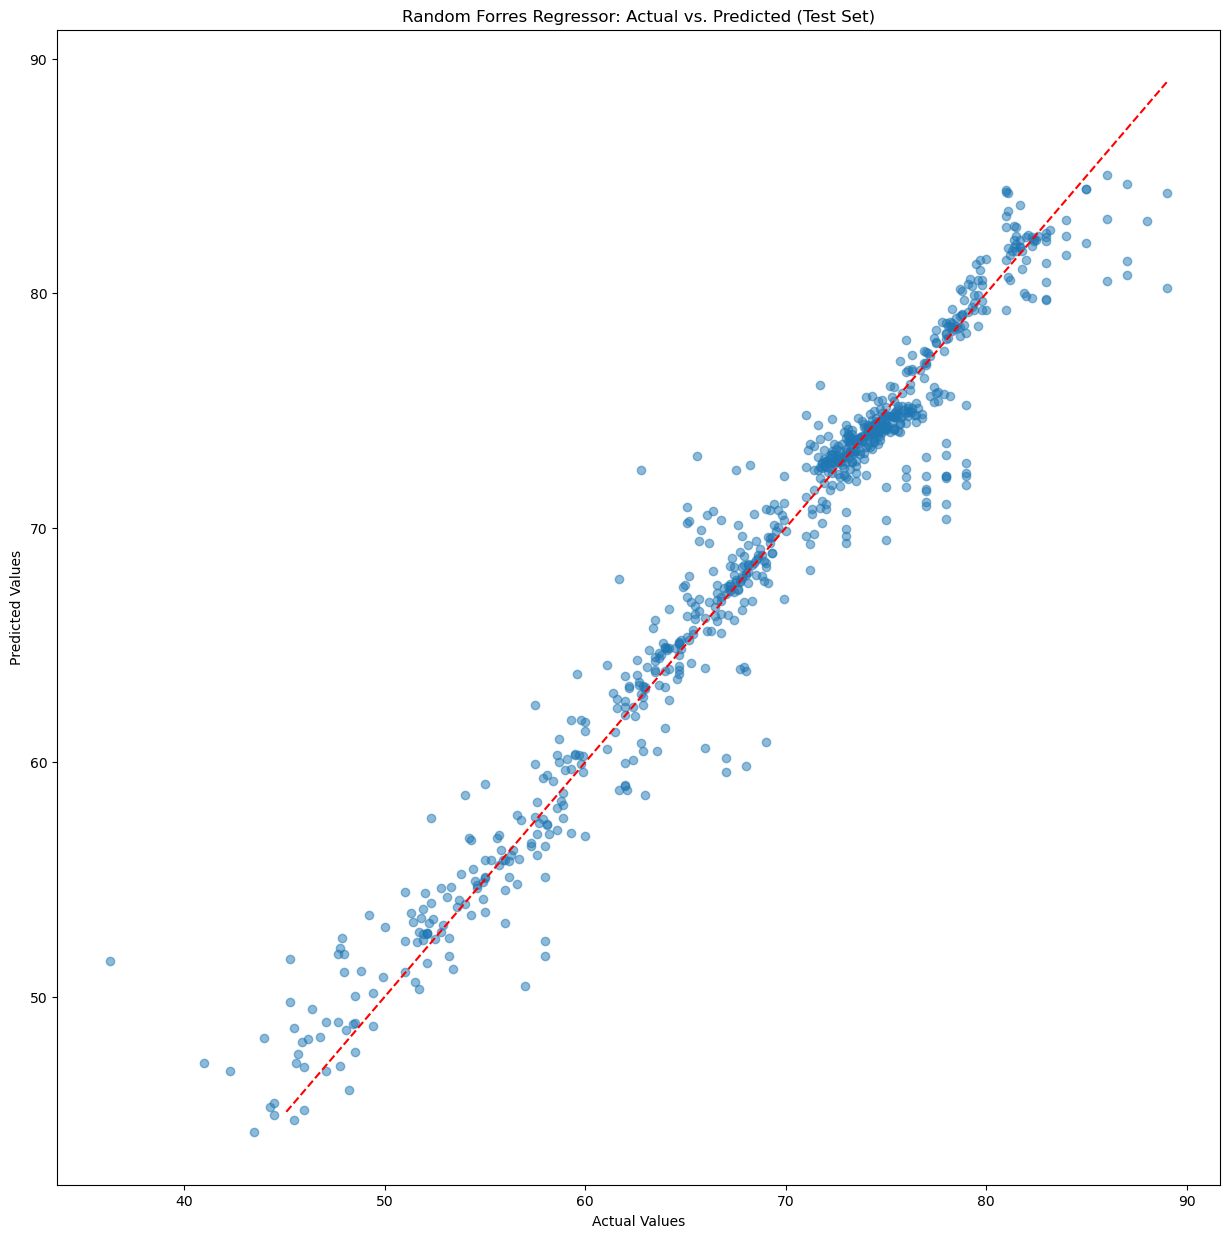

In [18]:
# Scatter plot for test set
plt.figure(figsize=(15,15))
plt.scatter(yval, val_predictions_rf, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forres Regressor: Actual vs. Predicted (Test Set)')
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], color='red', linestyle='--')  # Diagonal line
plt.show()

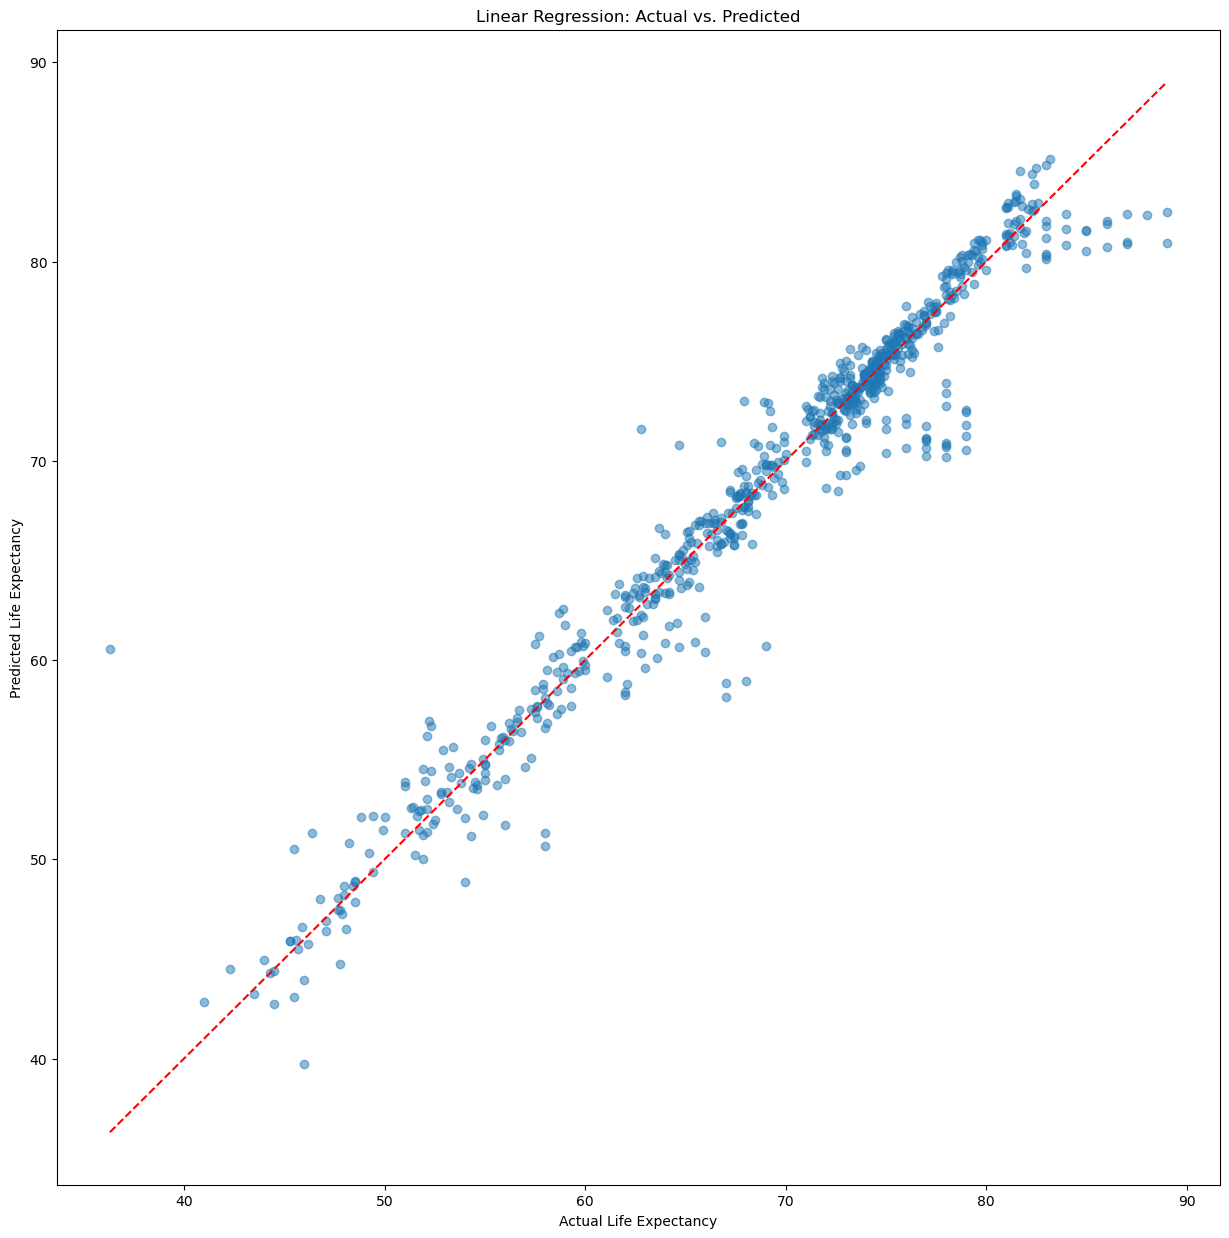

Test RMSE: 1.8573906814853454, Test MAE: 1.1238742585045653


In [19]:
# Example: Training a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(train_data_prepared, ytrain)

# Predict on validation set
val_predictions_lr = lr_model.predict(val_data_prepared)

plt.figure(figsize=(15,15))
# Create a scatter plot of actual vs. predicted values
plt.scatter(yval, val_predictions_lr, alpha=0.5)
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')

# Overlay the regression line (y = x)
plt.plot([min(yval), max(yval)], [min(yval), max(yval)], color='red', linestyle='--')
plt.title('Linear Regression: Actual vs. Predicted')
plt.show()

# Predict on test set
test_predictions_lr = lr_model.predict(test_data_prepared)

# Calculate RMSE and MAE for test set
test_rmse_lr = mean_squared_error(ytest, test_predictions_lr, squared=False)
test_mae_lr = mean_absolute_error(ytest, test_predictions_lr)

print(f"Test RMSE: {test_rmse_lr}, Test MAE: {test_mae_lr}")

In [20]:
weights = lr_model.coef_
intercept = lr_model.intercept_

# Displaying the first 20 and last 20 weights (coefficients)
print("First 20 Weights (Coefficients): \n", weights[:20])
print("Last 20 Weights (Coefficients): \n", weights[-20:])
print("Intercept: ", intercept)

First 20 Weights (Coefficients): 
 [ 1.18638388 -0.19812951  7.61499357 -0.27479455  0.23192498 -0.13921763
 -0.16213314 -0.02222653 -7.80764252  0.20775874  0.05178882  0.11177384
 -2.09660455 -0.15474382  0.03028914  0.4438439  -0.15026657 -0.18558448
  0.4071959  -9.98356515]
Last 20 Weights (Coefficients): 
 [ 3.15042392  5.21893799  5.78698661 -3.40597507 -7.32866289  2.73514568
  7.50544303  2.43342155 -8.41690753 -0.68406701  7.92222069 -0.51511266
  2.51554406  5.80947745  5.97439133 -4.36556642 -8.20226782 -8.14898879
  5.44457758 -5.44457758]
Intercept:  72.5616159611251


In [21]:
# Define the parameter grid
param_grid = {
    'max_depth': range(1, 15)
}

param_comb = ParameterGrid(param_grid)

val_metric = []
for params in param_comb:
    clf = DecisionTreeRegressor(**params, random_state = 42).fit(train_data_prepared, ytrain)
    val_metric.append(mean_squared_error(yval, clf.predict(val_data_prepared), squared = False))
    
best_params = param_comb[np.argmin(val_metric)]
print(f"We found the best params {best_params} with validation RMSE {min(val_metric):.3f}.")

# Initialize the best DecisionTreeRegressor with found parameters
best_clfDT = DecisionTreeRegressor(**best_params, random_state=42)

# Now you would fit this best regressor to your entire training data
best_clfDT.fit(train_data_prepared, ytrain)

# Predict on validation set
val_predictions_dt = best_clfDT.predict(val_data_prepared)

# Predict on test set
test_predictions_dt = best_clfDT.predict(test_data_prepared)

# Calculate RMSE and MAE for test set
test_rmse_dt = mean_squared_error(ytest, test_predictions_dt, squared=False)
test_mae_dt = mean_absolute_error(ytest, test_predictions_dt)

print(f"Test RMSE: {test_rmse_dt}, Test MAE: {test_mae_dt}")

We found the best params {'max_depth': 11} with validation RMSE 2.785.
Test RMSE: 2.8070574830961212, Test MAE: 1.7472724643334385


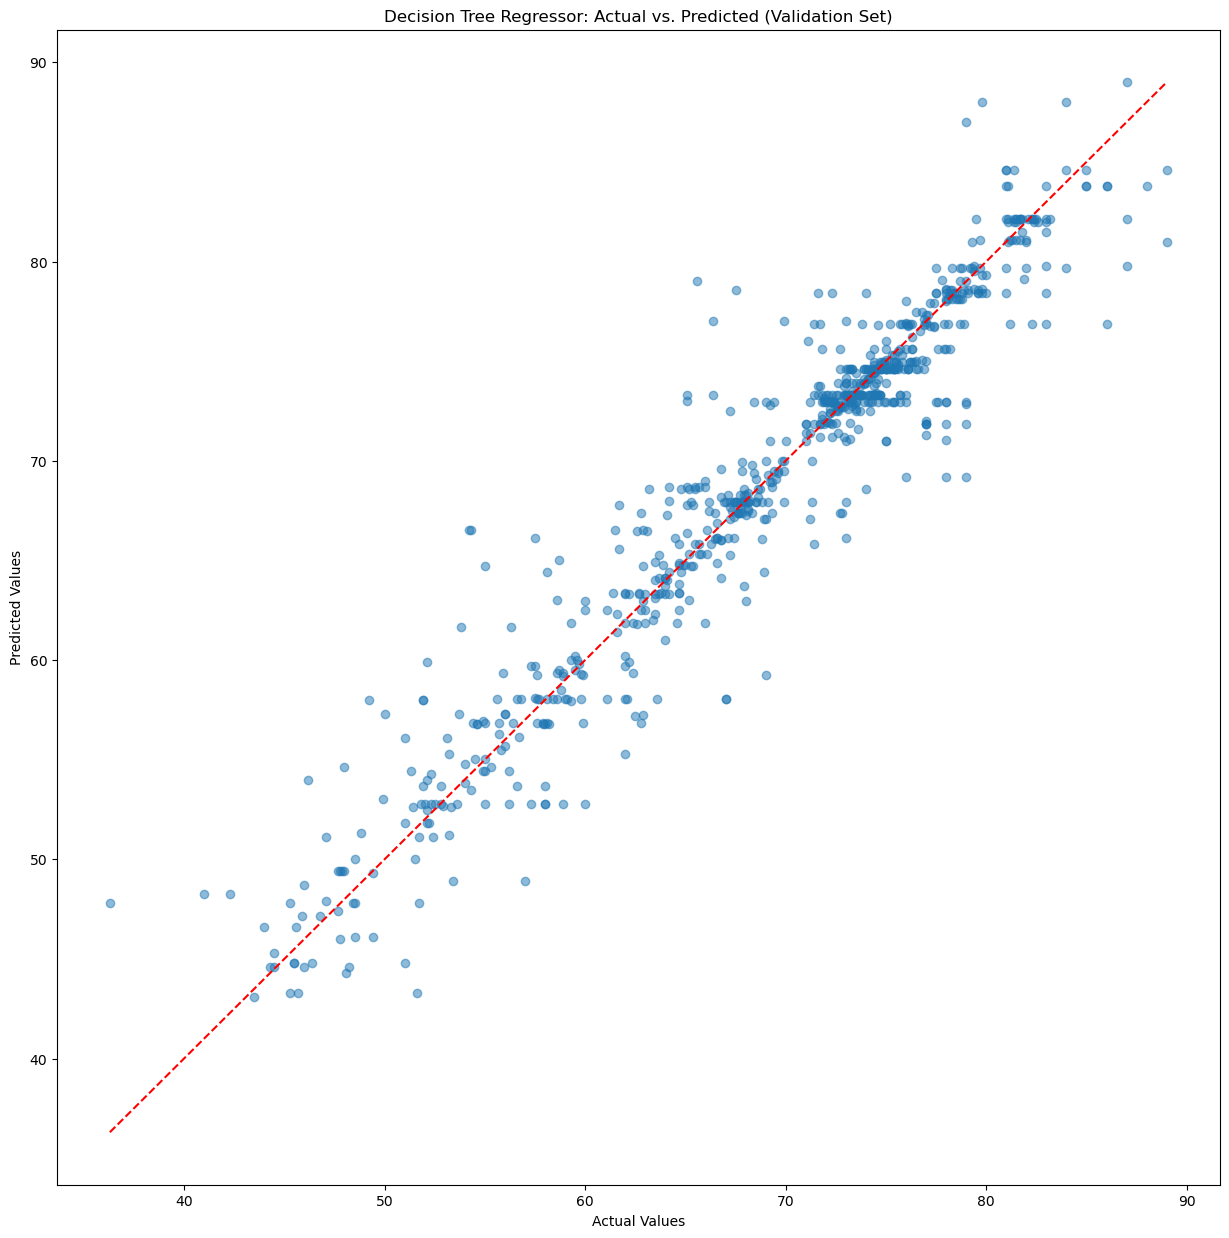

In [22]:
# Scatter plot for validation set
plt.figure(figsize=(15,15))
plt.scatter(yval, val_predictions_dt, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree Regressor: Actual vs. Predicted (Validation Set)')
plt.plot([min(yval), max(yval)], [min(yval), max(yval)], color='red', linestyle='--')  # Diagonal line
plt.show()

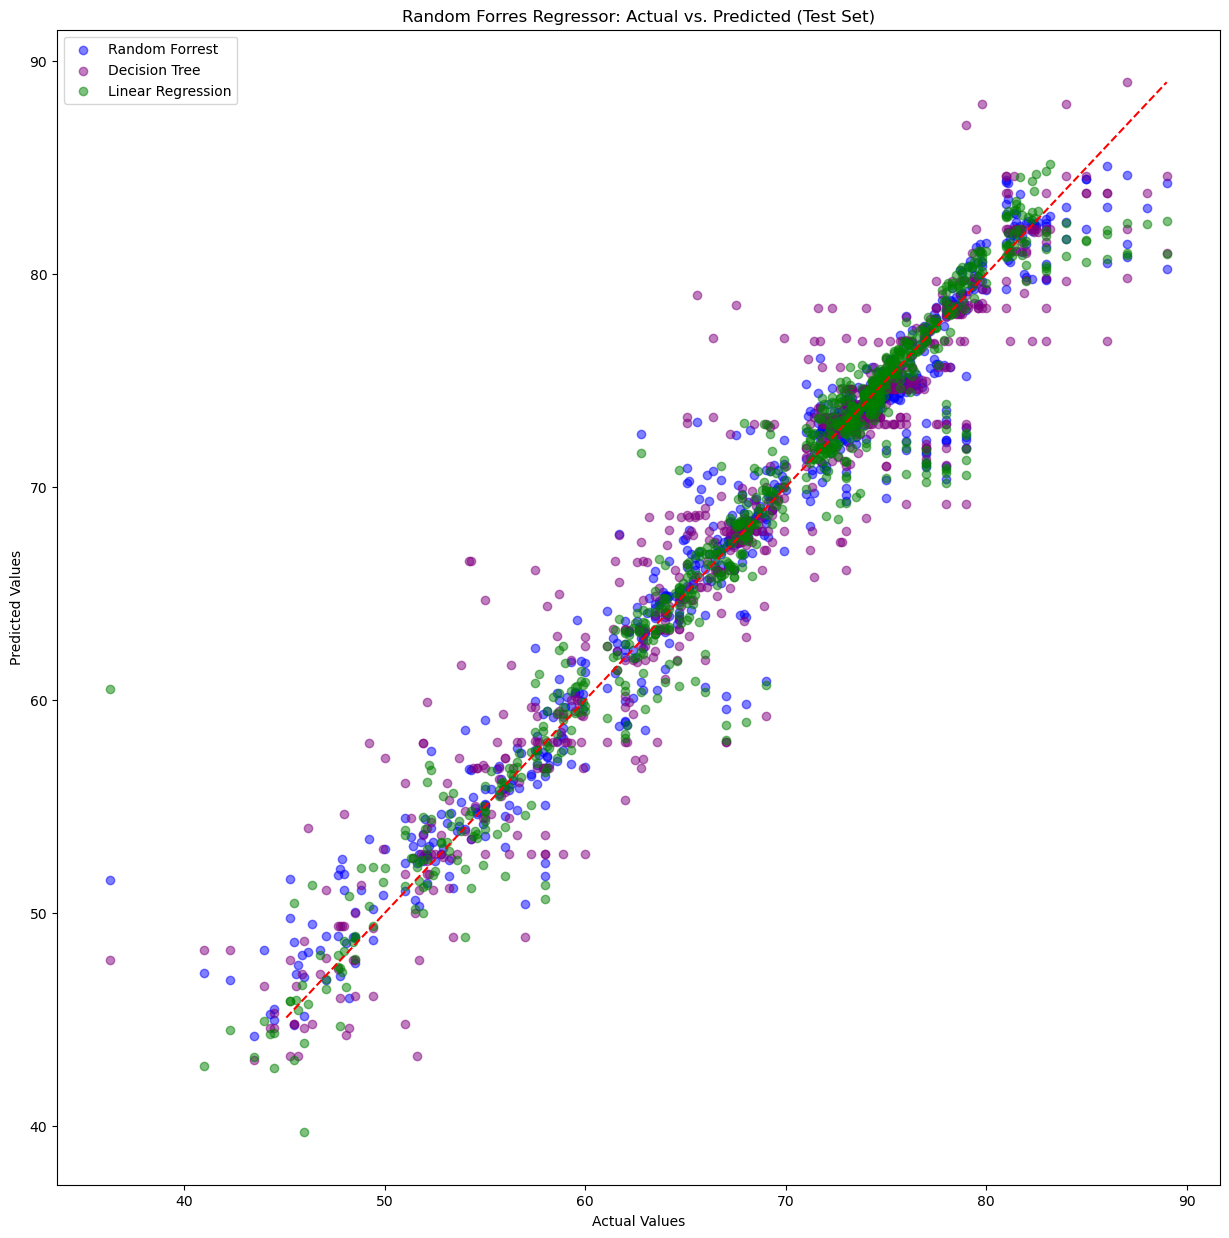

In [23]:
# Scatter plot for test set of every implemented model
plt.figure(figsize=(15,15))


plt.scatter(yval, val_predictions_rf, alpha=0.5, color='blue', label='Random Forrest')
plt.scatter(yval, val_predictions_dt, alpha=0.5, color='purple', label='Decision Tree')
plt.scatter(yval, val_predictions_lr, alpha=0.5, color='green', label='Linear Regression')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forres Regressor: Actual vs. Predicted (Test Set)')

plt.legend()
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], color='red', linestyle='--')  # Diagonal line
plt.show()

In [24]:
print(f"Random Forrest: Test RMSE: {test_rmse_rf:.3f}, Test MAE: {test_mae_rf:.3f}")
print(f"Linear Regression: Test RMSE: {test_rmse_lr:.3f}, Test MAE: {test_mae_lr:.3f}")
print(f"Decision Tree: Test RMSE: {test_rmse_dt:.3f}, Test MAE: {test_mae_dt:.3f}")

Random Forrest: Test RMSE: 1.894, Test MAE: 1.179
Linear Regression: Test RMSE: 1.857, Test MAE: 1.124
Decision Tree: Test RMSE: 2.807, Test MAE: 1.747


Based on the RMSE and MAE, we can conclude that the best model for our data is Linear Regression. This is also evident in the scatter plot, where the dots for linear regression are more densely clustered

In [25]:
# Load evaluation data
evaluation_data = pd.read_csv('evaluation.csv')

# Preprocess evaluation data
evaluation_data_prepared = preprocessor.transform(evaluation_data)

# Predict using the best model
final_predictions = lr_model.predict(evaluation_data_prepared)

# If you want to round the predictions to one decimal place, you can do it like this:
final_predictions = np.round(final_predictions, 1)

# Save the predictions to a CSV file
results = evaluation_data[['Country', 'Year']].copy()
results['Life expectancy'] = final_predictions
results.to_csv('results.csv', index=False)

In [26]:
evaluation_data['Country'].unique()

array(['Azerbaijan', 'Belgium', 'Belize', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bulgaria', 'Canada',
       'Colombia', 'Czechia', 'Democratic Republic of the Congo',
       'El Salvador', 'Ethiopia', 'Fiji', 'Gambia', 'Guatemala',
       'Guinea-Bissau', 'Guyana', 'Indonesia', 'Japan', 'Madagascar',
       'Malawi', 'Myanmar', 'Nepal', 'Niger', 'Norway', 'Paraguay',
       'Peru', 'Slovakia', 'Slovenia', 'Solomon Islands', 'South Sudan',
       'Swaziland', 'The former Yugoslav republic of Macedonia', 'Togo',
       'United Republic of Tanzania'], dtype=object)